In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import warnings

warnings.simplefilter('ignore')

In [2]:
df = pd.read_csv("Data/Player_data.csv")

In [3]:
df

,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,...,PrgDistCarry/90,ProgCarry/90,CarryIntoThird/90,CarryIntoBox/90,Miscontrol/90,Dispossessed/90,PassTarget/90,PassesReceived/90,PassRec%,ProgPassReceived/90
0,Patrick van Aanholt,nl NED,DF,Crystal Palace,eng Premier League,29.0,1990.0,22,20,"1,777",...,96.8,5.79,1.52,0.46,0.66,0.81,42.3,39.3,92.8,2.34
1,Yunis Abdelhamid,ma MAR,DF,Reims,fr Ligue 1,32.0,1987.0,33,33,"2,889",...,130.5,1.81,0.25,0.03,0.25,0.47,43.8,42.5,97.0,0.22
2,Pape Abou Cisse,sn SEN,DF,Saint-Étienne,fr Ligue 1,24.0,1995.0,14,14,"1,260",...,117.9,1.14,0.07,0.00,0.14,0.07,33.7,32.9,97.7,0.00
3,David Abraham,ar ARG,DF,Eint Frankfurt,de Bundesliga,34.0,1986.0,14,14,"1,222",...,92.7,3.24,0.66,0.00,0.22,0.00,34.8,33.4,96.0,0.59
4,Francesco Acerbi,it ITA,DF,Lazio,it Serie A,32.0,1988.0,32,32,"2,813",...,166.3,3.71,1.02,0.03,0.45,0.26,50.9,49.5,97.3,0.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,Reinhold Yabo,de GER,"MF,FW",Arminia,de Bundesliga,28.0,1992.0,13,8,647,...,76.3,3.47,1.39,0.42,0.97,0.97,31.1,21.0,67.4,2.78
2819,Amin Younes,de GER,"MF,FW",Eint Frankfurt,de Bundesliga,26.0,1993.0,26,16,"1,391",...,138.4,8.71,2.00,1.03,2.19,2.58,58.1,44.3,76.2,8.26
2820,Mattia Zaccagni,it ITA,"MF,FW",Hellas Verona,it Serie A,25.0,1995.0,36,33,"2,609",...,141.8,7.45,2.52,1.10,2.31,2.86,49.2,35.5,72.1,8.21
2821,Arber Zeneli,xk KVX,"MF,FW",Reims,fr Ligue 1,25.0,1995.0,28,14,"1,289",...,102.0,5.24,1.40,1.12,2.94,2.45,40.3,28.0,69.3,6.15


In [4]:
df1 = df.drop(['Player', 'Nation', 'Squad', 'Comp', 'Born', 'MP',
       'Starts', 'Min', '90s'], axis=1)
df1.head()

,Pos,Age,Ast/90,npG/90,npG+A/90,xA/90,npxG/90,npxG+xA/90,Shots/90,SoTs/90,...,PrgDistCarry/90,ProgCarry/90,CarryIntoThird/90,CarryIntoBox/90,Miscontrol/90,Dispossessed/90,PassTarget/90,PassesReceived/90,PassRec%,ProgPassReceived/90
0,DF,29.0,0.05,0.00,0.05,0.04,0.06,0.10,0.91,0.30,...,96.8,5.79,1.52,0.46,0.66,0.81,42.3,39.3,92.8,2.34
1,DF,32.0,0.00,0.09,0.09,0.01,0.05,0.06,0.47,0.16,...,130.5,1.81,0.25,0.03,0.25,0.47,43.8,42.5,97.0,0.22
2,DF,24.0,0.00,0.00,0.00,0.00,0.08,0.09,0.93,0.21,...,117.9,1.14,0.07,0.00,0.14,0.07,33.7,32.9,97.7,0.00
3,DF,34.0,0.00,0.07,0.07,0.03,0.05,0.08,0.66,0.15,...,92.7,3.24,0.66,0.00,0.22,0.00,34.8,33.4,96.0,0.59
4,DF,32.0,0.03,0.00,0.03,0.03,0.03,0.06,0.26,0.00,...,166.3,3.71,1.02,0.03,0.45,0.26,50.9,49.5,97.3,0.70


In [5]:
label_encoder = LabelEncoder()

# Encode the "Pos" column
df1['Pos_Encoded'] = label_encoder.fit_transform(df1['Pos'])

encoded_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

print("Encoded mapping:")
for key, value in encoded_mapping.items():
    print(f"{value}: {key}")

Encoded mapping:
0: DF
1: DF,FW
2: DF,MF
3: FW
4: FW,DF
5: FW,MF
6: GK
7: GK,MF
8: MF
9: MF,DF
10: MF,FW


In [6]:
df1 = df1.drop('Pos',axis=1)
df1.head()

,Age,Ast/90,npG/90,npG+A/90,xA/90,npxG/90,npxG+xA/90,Shots/90,SoTs/90,SoT%,...,ProgCarry/90,CarryIntoThird/90,CarryIntoBox/90,Miscontrol/90,Dispossessed/90,PassTarget/90,PassesReceived/90,PassRec%,ProgPassReceived/90,Pos_Encoded
0,29.0,0.05,0.00,0.05,0.04,0.06,0.10,0.91,0.30,33.3,...,5.79,1.52,0.46,0.66,0.81,42.3,39.3,92.8,2.34,0
1,32.0,0.00,0.09,0.09,0.01,0.05,0.06,0.47,0.16,33.3,...,1.81,0.25,0.03,0.25,0.47,43.8,42.5,97.0,0.22,0
2,24.0,0.00,0.00,0.00,0.00,0.08,0.09,0.93,0.21,23.1,...,1.14,0.07,0.00,0.14,0.07,33.7,32.9,97.7,0.00,0
3,34.0,0.00,0.07,0.07,0.03,0.05,0.08,0.66,0.15,22.2,...,3.24,0.66,0.00,0.22,0.00,34.8,33.4,96.0,0.59,0
4,32.0,0.03,0.00,0.03,0.03,0.03,0.06,0.26,0.00,0.0,...,3.71,1.02,0.03,0.45,0.26,50.9,49.5,97.3,0.70,0


In [7]:
df1.replace('#DIV/0!', 0, inplace=True)
df1.fillna(0, inplace=True)
print(df1.isnull().sum())

Age                    0
Ast/90                 0
npG/90                 0
npG+A/90               0
xA/90                  0
                      ..
PassTarget/90          0
PassesReceived/90      0
PassRec%               0
ProgPassReceived/90    0
Pos_Encoded            0
Length: 119, dtype: int64


In [8]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df1.drop('Pos_Encoded', axis=1))
scaled_df = pd.DataFrame(scaled_data, columns=df1.drop('Pos_Encoded', axis=1).columns)
scaled_df['Pos_Encoded'] = df1['Pos_Encoded']
scaled_df.head()

,Age,Ast/90,npG/90,npG+A/90,xA/90,npxG/90,npxG+xA/90,Shots/90,SoTs/90,SoT%,...,ProgCarry/90,CarryIntoThird/90,CarryIntoBox/90,Miscontrol/90,Dispossessed/90,PassTarget/90,PassesReceived/90,PassRec%,ProgPassReceived/90,Pos_Encoded
0,0.811342,-0.133881,-0.572368,-0.414915,-0.262496,-0.274314,-0.354759,-0.154265,-0.095325,0.409017,...,0.652945,0.272632,0.196689,-0.400039,-0.269409,-0.072776,0.226454,0.576964,-0.297591,0
1,1.458658,-0.349578,-0.022716,-0.281880,-0.465387,-0.327012,-0.510893,-0.513823,-0.381540,0.409017,...,-0.668867,-0.705183,-0.524026,-0.644202,-0.502675,0.018461,0.434973,0.816421,-0.859809,0
2,-0.267517,-0.349578,-0.572368,-0.581208,-0.533018,-0.168919,-0.393792,-0.137921,-0.279321,-0.056101,...,-0.891384,-0.843771,-0.574309,-0.709709,-0.777105,-0.595868,-0.190583,0.856330,-0.918152,0
3,1.890202,-0.349578,-0.144861,-0.348397,-0.330126,-0.327012,-0.432826,-0.358559,-0.401984,-0.097141,...,-0.193945,-0.389510,-0.574309,-0.662068,-0.825130,-0.528961,-0.158002,0.759407,-0.761686,0
4,1.458658,-0.220160,-0.572368,-0.481432,-0.330126,-0.432407,-0.510893,-0.685430,-0.708643,-1.109457,...,-0.037851,-0.112334,-0.524026,-0.525098,-0.646750,0.450317,0.891107,0.833525,-0.732514,0


### Creating clusters for each position

In [9]:
df_0 = scaled_df[scaled_df['Pos_Encoded'] == 0]
df_1 = scaled_df[scaled_df['Pos_Encoded'] == 1]
df_2 = scaled_df[scaled_df['Pos_Encoded'] == 2]
df_3 = scaled_df[scaled_df['Pos_Encoded'] == 3]
df_4 = scaled_df[scaled_df['Pos_Encoded'] == 4]
df_5 = scaled_df[scaled_df['Pos_Encoded'] == 5]
df_6 = scaled_df[scaled_df['Pos_Encoded'] == 6]
df_7 = scaled_df[scaled_df['Pos_Encoded'] == 7]
df_8 = scaled_df[scaled_df['Pos_Encoded'] == 8]
df_9 = scaled_df[scaled_df['Pos_Encoded'] == 9]
df_10 = scaled_df[scaled_df['Pos_Encoded'] == 10]

In [10]:
# Print the size of each DataFrame
print("Size of df_0:", df_0.shape[0])
print("Size of df_1:", df_1.shape[0])
print("Size of df_2:", df_2.shape[0])
print("Size of df_3:", df_3.shape[0])
print("Size of df_4:", df_4.shape[0])
print("Size of df_5:", df_5.shape[0])
print("Size of df_6:", df_6.shape[0])
print("Size of df_7:", df_7.shape[0])
print("Size of df_8:", df_8.shape[0])
print("Size of df_9:", df_9.shape[0])
print("Size of df_10:", df_10.shape[0])

Size of df_0: 906
Size of df_1: 34
Size of df_2: 79
Size of df_3: 386
Size of df_4: 21
Size of df_5: 298
Size of df_6: 207
Size of df_7: 1
Size of df_8: 594
Size of df_9: 69
Size of df_10: 228


### for df_0

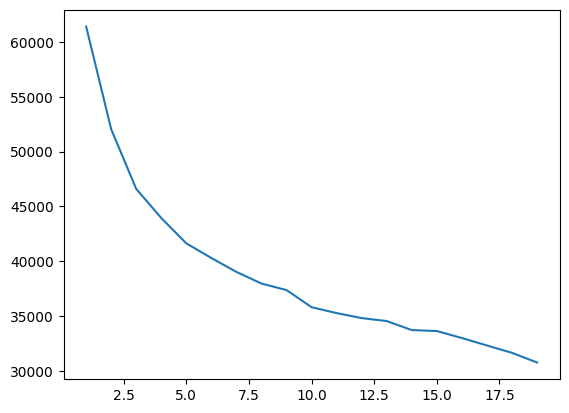

In [11]:
clusters=list(range(1,20))
ssd = []
df_0_d=df_0.drop('Pos_Encoded',axis=1)
for num_clusters in clusters:
    model_clus = KMeans(n_clusters = num_clusters, max_iter=150,random_state= 50)
    model_clus.fit(df_0_d)
    ssd.append(model_clus.inertia_)

plt.plot(clusters,ssd);

In [12]:
from sklearn.metrics import silhouette_score

range_n_clusters = list(range(2, 21))  # Adjust the range of clusters as needed

for num_clusters in range_n_clusters:
    # Initialize KMeans with the current number of clusters
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50, random_state=100)
    kmeans.fit(df_0_d)
    
    # Get cluster labels
    cluster_labels = kmeans.labels_
    
    # Compute silhouette score
    silhouette_avg = silhouette_score(df_0_d, cluster_labels)
    print("For n_clusters = {0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters = 2, the silhouette score is 0.18428861665269936
For n_clusters = 3, the silhouette score is 0.15247998410261898
For n_clusters = 4, the silhouette score is 0.15771294141474626
For n_clusters = 5, the silhouette score is 0.1465440963889133
For n_clusters = 6, the silhouette score is 0.11596456583422325
For n_clusters = 7, the silhouette score is 0.12279022622074641
For n_clusters = 8, the silhouette score is 0.12108422334328263
For n_clusters = 9, the silhouette score is 0.09860044964742375
For n_clusters = 10, the silhouette score is 0.08617326436118071
For n_clusters = 11, the silhouette score is 0.06567334104222126
For n_clusters = 12, the silhouette score is 0.07320577320056929
For n_clusters = 13, the silhouette score is 0.06141675458399936
For n_clusters = 14, the silhouette score is 0.06364842619303836
For n_clusters = 15, the silhouette score is 0.05747087161383569
For n_clusters = 16, the silhouette score is 0.06011434718873736
For n_clusters = 17, the silhouett

#### we will select 5 clusters for df_0

In [13]:
cluster = KMeans(n_clusters=5, max_iter=150, random_state= 15)
cluster.fit(df_0_d)

KMeans(max_iter=150, n_clusters=5, random_state=15)

In [14]:
df_0['Cluster_Id'] = cluster.labels_
df_0.Cluster_Id.value_counts()

Cluster_Id
2    320
1    239
0    225
4    105
3     17
Name: count, dtype: int64

### similarly we will cluster the players for df_1

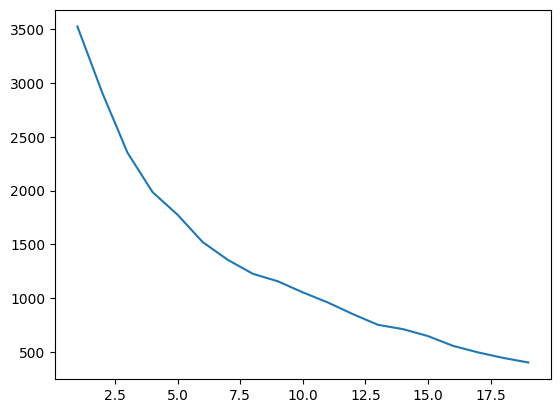

In [15]:
clusters=list(range(1,20))
ssd = []
df_1_d=df_1.drop('Pos_Encoded',axis=1)
for num_clusters in clusters:
    model_clus = KMeans(n_clusters = num_clusters, max_iter=150,random_state= 50)
    model_clus.fit(df_1_d)
    ssd.append(model_clus.inertia_)

plt.plot(clusters,ssd);

In [16]:
from sklearn.metrics import silhouette_score

range_n_clusters = list(range(2, 21))  # Adjust the range of clusters as needed

for num_clusters in range_n_clusters:
    # Initialize KMeans with the current number of clusters
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50, random_state=100)
    kmeans.fit(df_1_d)
    
    # Get cluster labels
    cluster_labels = kmeans.labels_
    
    # Compute silhouette score
    silhouette_avg = silhouette_score(df_1_d, cluster_labels)
    print("For n_clusters = {0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters = 2, the silhouette score is 0.5183161169670961
For n_clusters = 3, the silhouette score is 0.38946633482248966
For n_clusters = 4, the silhouette score is 0.33356799239376644
For n_clusters = 5, the silhouette score is 0.08306449068183658
For n_clusters = 6, the silhouette score is 0.11100065162837126
For n_clusters = 7, the silhouette score is 0.11376346067757444
For n_clusters = 8, the silhouette score is 0.11966882072197237
For n_clusters = 9, the silhouette score is 0.05879288655420135
For n_clusters = 10, the silhouette score is 0.0803704789733858
For n_clusters = 11, the silhouette score is 0.1009601113529858
For n_clusters = 12, the silhouette score is 0.08618382156311333
For n_clusters = 13, the silhouette score is 0.07905515743773199
For n_clusters = 14, the silhouette score is 0.06234127441861816
For n_clusters = 15, the silhouette score is 0.057616342780796186
For n_clusters = 16, the silhouette score is 0.0614339089443003
For n_clusters = 17, the silhouette 

#### We will choose 4 clusters

In [17]:
cluster = KMeans(n_clusters=2, max_iter=150, random_state= 15)
cluster.fit(df_1_d)
df_1['Cluster_Id'] = cluster.labels_
df_1.Cluster_Id.value_counts()

Cluster_Id
1    32
0     2
Name: count, dtype: int64

### similarly we will cluster the players for df_2

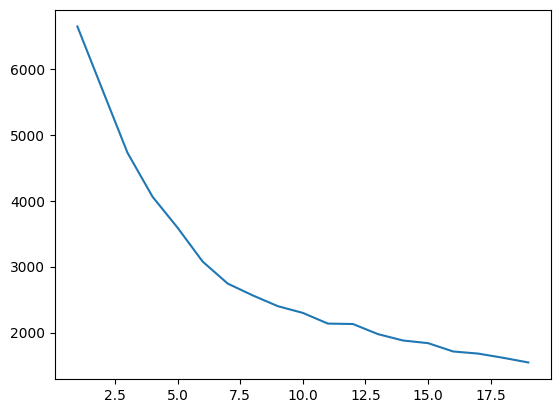

In [18]:
clusters=list(range(1,20))
df_2_d=df_2.drop('Pos_Encoded',axis=1)
ssd = []
for num_clusters in clusters:
    model_clus = KMeans(n_clusters = num_clusters, max_iter=150,random_state= 50)
    model_clus.fit(df_2_d)
    ssd.append(model_clus.inertia_)

plt.plot(clusters,ssd);

In [19]:
from sklearn.metrics import silhouette_score

range_n_clusters = list(range(2, 21))  # Adjust the range of clusters as needed

for num_clusters in range_n_clusters:
    # Initialize KMeans with the current number of clusters
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50, random_state=100)
    kmeans.fit(df_2_d)
    
    # Get cluster labels
    cluster_labels = kmeans.labels_
    
    # Compute silhouette score
    silhouette_avg = silhouette_score(df_2_d, cluster_labels)
    print("For n_clusters = {0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters = 2, the silhouette score is 0.693213618177961
For n_clusters = 3, the silhouette score is 0.12377070189780144
For n_clusters = 4, the silhouette score is 0.14738146811431357
For n_clusters = 5, the silhouette score is 0.1383267172105116
For n_clusters = 6, the silhouette score is 0.14848656021658707
For n_clusters = 7, the silhouette score is 0.13978802292092773
For n_clusters = 8, the silhouette score is 0.12982335292063976
For n_clusters = 9, the silhouette score is 0.09668932858221078
For n_clusters = 10, the silhouette score is 0.10896574528126204
For n_clusters = 11, the silhouette score is 0.08519589016818095
For n_clusters = 12, the silhouette score is 0.10616833064469834
For n_clusters = 13, the silhouette score is 0.09440177403099292
For n_clusters = 14, the silhouette score is 0.08021231603340107
For n_clusters = 15, the silhouette score is 0.09718822982478484
For n_clusters = 16, the silhouette score is 0.09175478594093785
For n_clusters = 17, the silhouette 

In [20]:
cluster = KMeans(n_clusters=3, max_iter=150, random_state= 15)
cluster.fit(df_2_d)
df_2['Cluster_Id'] = cluster.labels_
df_2.Cluster_Id.value_counts()

Cluster_Id
1    47
0    31
2     1
Name: count, dtype: int64

### for df_3

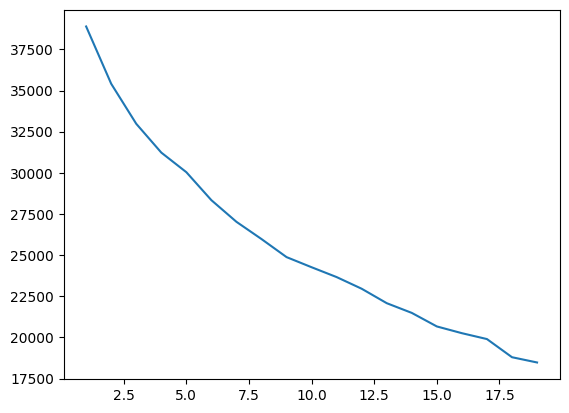

In [21]:
clusters=list(range(1,20))
ssd = []
df_3_d=df_3.drop('Pos_Encoded',axis=1)
for num_clusters in clusters:
    model_clus = KMeans(n_clusters = num_clusters, max_iter=150,random_state= 50)
    model_clus.fit(df_3_d)
    ssd.append(model_clus.inertia_)

plt.plot(clusters,ssd);

In [22]:
from sklearn.metrics import silhouette_score

range_n_clusters = list(range(2, 21))  # Adjust the range of clusters as needed

for num_clusters in range_n_clusters:
    # Initialize KMeans with the current number of clusters
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50, random_state=100)
    kmeans.fit(df_3_d)
    
    # Get cluster labels
    cluster_labels = kmeans.labels_
    
    # Compute silhouette score
    silhouette_avg = silhouette_score(df_3_d, cluster_labels)
    print("For n_clusters = {0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters = 2, the silhouette score is 0.15475064787868623
For n_clusters = 3, the silhouette score is 0.1863217842423536
For n_clusters = 4, the silhouette score is 0.15625323638789823
For n_clusters = 5, the silhouette score is 0.12531889349751466
For n_clusters = 6, the silhouette score is 0.15642540079856382
For n_clusters = 7, the silhouette score is 0.1416300048903905
For n_clusters = 8, the silhouette score is 0.1460799695782574
For n_clusters = 9, the silhouette score is 0.13913202144394995
For n_clusters = 10, the silhouette score is 0.08857785085009988
For n_clusters = 11, the silhouette score is 0.09827615378092411
For n_clusters = 12, the silhouette score is 0.02652824018911631
For n_clusters = 13, the silhouette score is 0.04393856802022116
For n_clusters = 14, the silhouette score is 0.08794024301694561
For n_clusters = 15, the silhouette score is 0.018051746150021163
For n_clusters = 16, the silhouette score is 0.03697048850266607
For n_clusters = 17, the silhouette

In [23]:
cluster = KMeans(n_clusters=4, max_iter=150, random_state= 15)
cluster.fit(df_3_d)
df_3['Cluster_Id'] = cluster.labels_
df_3.Cluster_Id.value_counts()

Cluster_Id
1    234
0    108
2     28
3     16
Name: count, dtype: int64

### for df_4

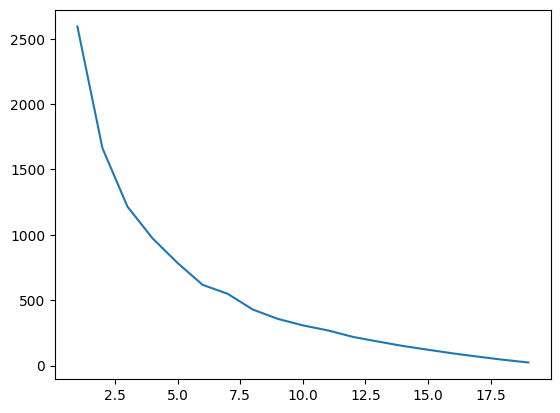

In [24]:
clusters=list(range(1,20))
ssd = []
df_4_d=df_4.drop('Pos_Encoded',axis=1)
for num_clusters in clusters:
    model_clus = KMeans(n_clusters = num_clusters, max_iter=150,random_state= 50)
    model_clus.fit(df_4_d)
    ssd.append(model_clus.inertia_)

plt.plot(clusters,ssd);

In [25]:
from sklearn.metrics import silhouette_score

range_n_clusters = list(range(2, 21))  # Adjust the range of clusters as needed

for num_clusters in range_n_clusters:
    # Initialize KMeans with the current number of clusters
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50, random_state=100)
    kmeans.fit(df_4_d)
    
    # Get cluster labels
    cluster_labels = kmeans.labels_
    
    # Compute silhouette score
    silhouette_avg = silhouette_score(df_4_d, cluster_labels)
    print("For n_clusters = {0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters = 2, the silhouette score is 0.5950037185007214
For n_clusters = 3, the silhouette score is 0.47276740876762846
For n_clusters = 4, the silhouette score is 0.3566930820523052
For n_clusters = 5, the silhouette score is 0.30795521994813513
For n_clusters = 6, the silhouette score is 0.18267542201457165
For n_clusters = 7, the silhouette score is 0.1074624920073916
For n_clusters = 8, the silhouette score is 0.1173485378500751
For n_clusters = 9, the silhouette score is 0.06592431174696431
For n_clusters = 10, the silhouette score is 0.08070865729387042
For n_clusters = 11, the silhouette score is 0.06701961091396022
For n_clusters = 12, the silhouette score is 0.08101210032435409
For n_clusters = 13, the silhouette score is 0.0495833251547869
For n_clusters = 14, the silhouette score is 0.07795598778976846
For n_clusters = 15, the silhouette score is 0.05289480057237174
For n_clusters = 16, the silhouette score is 0.06098647062383483
For n_clusters = 17, the silhouette sc

In [26]:
cluster = KMeans(n_clusters=2, max_iter=150, random_state= 15)
cluster.fit(df_4_d)
df_4['Cluster_Id'] = cluster.labels_
df_4.Cluster_Id.value_counts()

Cluster_Id
0    20
1     1
Name: count, dtype: int64

In [27]:
df_4.Cluster_Id.value_counts()

Cluster_Id
0    20
1     1
Name: count, dtype: int64

### for df_5

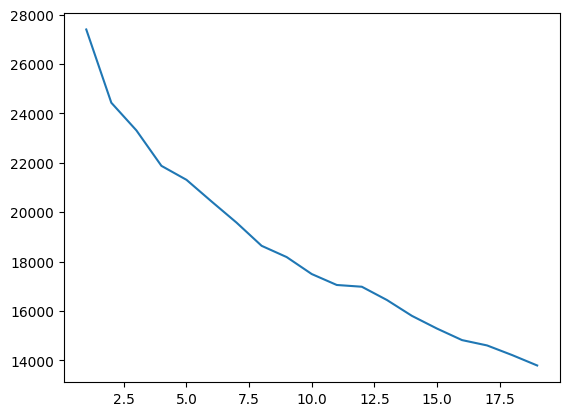

In [28]:
clusters=list(range(1,20))
ssd = []
df_5_d=df_5.drop('Pos_Encoded',axis=1)
for num_clusters in clusters:
    model_clus = KMeans(n_clusters = num_clusters, max_iter=150,random_state= 50)
    model_clus.fit(df_5_d)
    ssd.append(model_clus.inertia_)

plt.plot(clusters,ssd);

In [29]:
from sklearn.metrics import silhouette_score

range_n_clusters = list(range(2, 21))  # Adjust the range of clusters as needed

for num_clusters in range_n_clusters:
    # Initialize KMeans with the current number of clusters
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50, random_state=100)
    kmeans.fit(df_5_d)
    
    # Get cluster labels
    cluster_labels = kmeans.labels_
    
    # Compute silhouette score
    silhouette_avg = silhouette_score(df_5_d, cluster_labels)
    print("For n_clusters = {0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters = 2, the silhouette score is 0.14324095860946584
For n_clusters = 3, the silhouette score is 0.14001787772127428
For n_clusters = 4, the silhouette score is 0.10576504777083193
For n_clusters = 5, the silhouette score is 0.01909266452266882
For n_clusters = 6, the silhouette score is 0.07426622586674712
For n_clusters = 7, the silhouette score is 0.04863424057934984
For n_clusters = 8, the silhouette score is 0.05190245331992967
For n_clusters = 9, the silhouette score is 0.05976171900916797
For n_clusters = 10, the silhouette score is 0.04912693902021499
For n_clusters = 11, the silhouette score is 0.03004625017999795
For n_clusters = 12, the silhouette score is 0.0837699128612712
For n_clusters = 13, the silhouette score is 0.032267452724112994
For n_clusters = 14, the silhouette score is 0.05580711476585829
For n_clusters = 15, the silhouette score is 0.03234485107962558
For n_clusters = 16, the silhouette score is 0.027313971777176205
For n_clusters = 17, the silhoue

In [30]:
cluster = KMeans(n_clusters=2, max_iter=150, random_state= 15)
cluster.fit(df_5_d)
df_5['Cluster_Id'] = cluster.labels_
df_5.Cluster_Id.value_counts()

Cluster_Id
0    178
1    120
Name: count, dtype: int64

### for df_6

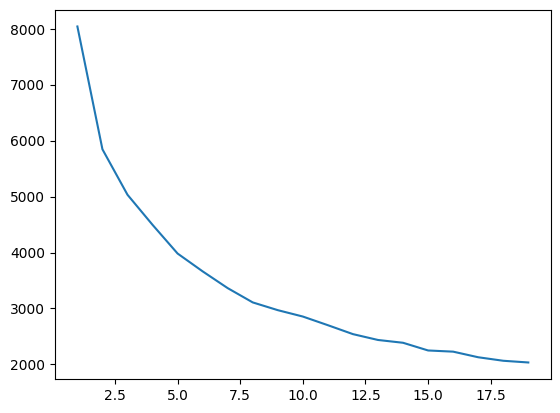

In [31]:
clusters=list(range(1,20))
ssd = []
df_6_d=df_6.drop('Pos_Encoded',axis=1)
for num_clusters in clusters:
    model_clus = KMeans(n_clusters = num_clusters, max_iter=150,random_state= 50)
    model_clus.fit(df_6_d)
    ssd.append(model_clus.inertia_)

plt.plot(clusters,ssd);

In [32]:
from sklearn.metrics import silhouette_score

range_n_clusters = list(range(2, 21))  # Adjust the range of clusters as needed

for num_clusters in range_n_clusters:
    # Initialize KMeans with the current number of clusters
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50, random_state=100)
    kmeans.fit(df_6_d)
    
    # Get cluster labels
    cluster_labels = kmeans.labels_
    
    # Compute silhouette score
    silhouette_avg = silhouette_score(df_6_d, cluster_labels)
    print("For n_clusters = {0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters = 2, the silhouette score is 0.8496336635690509
For n_clusters = 3, the silhouette score is 0.14465323323809867
For n_clusters = 4, the silhouette score is 0.15852809357485326
For n_clusters = 5, the silhouette score is 0.16376160201098514
For n_clusters = 6, the silhouette score is 0.17239843096829802
For n_clusters = 7, the silhouette score is 0.16457134648219035
For n_clusters = 8, the silhouette score is 0.15328377737707194
For n_clusters = 9, the silhouette score is 0.14602426068827482
For n_clusters = 10, the silhouette score is 0.16519516578447407
For n_clusters = 11, the silhouette score is 0.1612796690658018
For n_clusters = 12, the silhouette score is 0.16191722543354622
For n_clusters = 13, the silhouette score is 0.15809202028953107
For n_clusters = 14, the silhouette score is 0.15913169391906073
For n_clusters = 15, the silhouette score is 0.1688170772141317
For n_clusters = 16, the silhouette score is 0.1536564549120417
For n_clusters = 17, the silhouette s

In [33]:
cluster = KMeans(n_clusters=4, max_iter=150, random_state= 15)
cluster.fit(df_6_d)
df_6['Cluster_Id'] = cluster.labels_
df_6.Cluster_Id.value_counts()

Cluster_Id
0    97
3    81
2    28
1     1
Name: count, dtype: int64

### for df_8

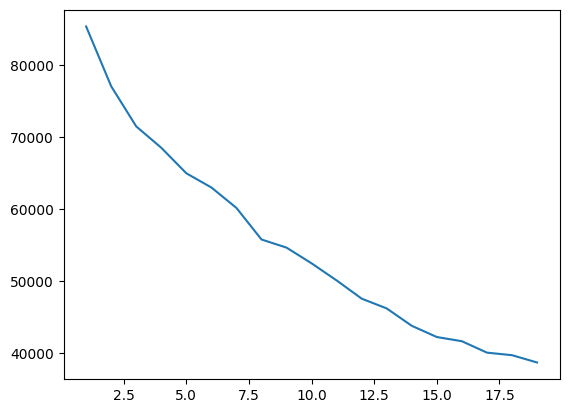

In [34]:
clusters=list(range(1,20))
ssd = []
df_8_d=df_8.drop('Pos_Encoded',axis=1)
for num_clusters in clusters:
    model_clus = KMeans(n_clusters = num_clusters, max_iter=150,random_state= 50)
    model_clus.fit(df_8_d)
    ssd.append(model_clus.inertia_)

plt.plot(clusters,ssd);

In [35]:
from sklearn.metrics import silhouette_score

range_n_clusters = list(range(2, 21))  # Adjust the range of clusters as needed

for num_clusters in range_n_clusters:
    # Initialize KMeans with the current number of clusters
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50, random_state=100)
    kmeans.fit(df_8_d)
    
    # Get cluster labels
    cluster_labels = kmeans.labels_
    
    # Compute silhouette score
    silhouette_avg = silhouette_score(df_8_d, cluster_labels)
    print("For n_clusters = {0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters = 2, the silhouette score is 0.13715618217293452
For n_clusters = 3, the silhouette score is 0.138713106723859
For n_clusters = 4, the silhouette score is 0.14774948379422054
For n_clusters = 5, the silhouette score is 0.12620635458844792
For n_clusters = 6, the silhouette score is 0.14621890160300846
For n_clusters = 7, the silhouette score is 0.1448878814862301
For n_clusters = 8, the silhouette score is 0.144885750403898
For n_clusters = 9, the silhouette score is 0.14511317360763457
For n_clusters = 10, the silhouette score is 0.1583091766636128
For n_clusters = 11, the silhouette score is 0.07498169652334959
For n_clusters = 12, the silhouette score is 0.12916944562347965
For n_clusters = 13, the silhouette score is 0.08181181649360779
For n_clusters = 14, the silhouette score is 0.06226521589910672
For n_clusters = 15, the silhouette score is 0.07568185188028125
For n_clusters = 16, the silhouette score is 0.041063621295035116
For n_clusters = 17, the silhouette sc

In [36]:
cluster = KMeans(n_clusters=4, max_iter=150, random_state= 15)
cluster.fit(df_8_d)
df_8['Cluster_Id'] = cluster.labels_
df_8.Cluster_Id.value_counts()

Cluster_Id
2    292
0    291
1      9
3      2
Name: count, dtype: int64

### for df_9

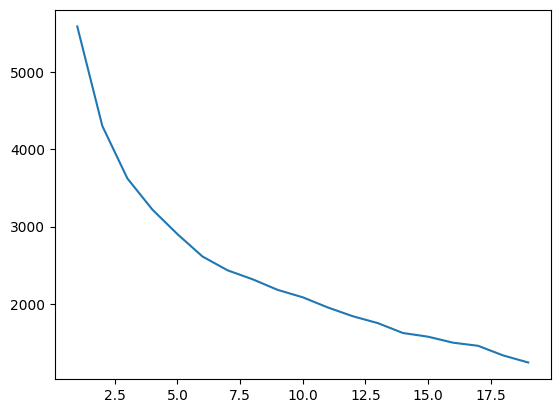

In [37]:
clusters=list(range(1,20))
ssd = []
df_9_d=df_9.drop('Pos_Encoded',axis=1)
for num_clusters in clusters:
    model_clus = KMeans(n_clusters = num_clusters, max_iter=150,random_state= 50)
    model_clus.fit(df_9_d)
    ssd.append(model_clus.inertia_)

plt.plot(clusters,ssd);

In [38]:
from sklearn.metrics import silhouette_score

range_n_clusters = list(range(2, 21))  # Adjust the range of clusters as needed

for num_clusters in range_n_clusters:
    # Initialize KMeans with the current number of clusters
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50, random_state=100)
    kmeans.fit(df_9_d)
    
    # Get cluster labels
    cluster_labels = kmeans.labels_
    
    # Compute silhouette score
    silhouette_avg = silhouette_score(df_9_d, cluster_labels)
    print("For n_clusters = {0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters = 2, the silhouette score is 0.7033890570817413
For n_clusters = 3, the silhouette score is 0.15121720839777428
For n_clusters = 4, the silhouette score is 0.1333149441942733
For n_clusters = 5, the silhouette score is 0.12218414283903402
For n_clusters = 6, the silhouette score is 0.08027642091187186
For n_clusters = 7, the silhouette score is 0.11325747576737531
For n_clusters = 8, the silhouette score is 0.05773235989858036
For n_clusters = 9, the silhouette score is 0.08429353499127579
For n_clusters = 10, the silhouette score is 0.08788345096603614
For n_clusters = 11, the silhouette score is 0.07169530560594335
For n_clusters = 12, the silhouette score is 0.08083321235559196
For n_clusters = 13, the silhouette score is 0.09037326137829568
For n_clusters = 14, the silhouette score is 0.07592026559870939
For n_clusters = 15, the silhouette score is 0.08786379531644943
For n_clusters = 16, the silhouette score is 0.0816326060943184
For n_clusters = 17, the silhouette 

In [39]:
cluster = KMeans(n_clusters=4, max_iter=150, random_state= 15)
cluster.fit(df_9_d)
df_9['Cluster_Id'] = cluster.labels_
df_9.Cluster_Id.value_counts()

Cluster_Id
0    37
1    19
3    12
2     1
Name: count, dtype: int64

### for df_10

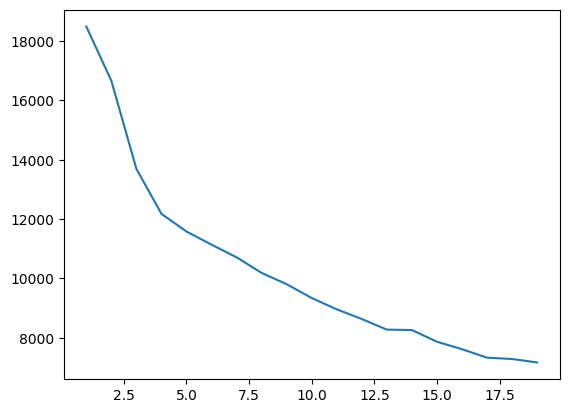

In [40]:
clusters=list(range(1,20))
ssd = []
df_10_d=df_10.drop('Pos_Encoded',axis=1)
for num_clusters in clusters:
    model_clus = KMeans(n_clusters = num_clusters, max_iter=150,random_state= 50)
    model_clus.fit(df_10_d)
    ssd.append(model_clus.inertia_)

plt.plot(clusters,ssd);

In [41]:
from sklearn.metrics import silhouette_score

range_n_clusters = list(range(2, 21))  # Adjust the range of clusters as needed

for num_clusters in range_n_clusters:
    # Initialize KMeans with the current number of clusters
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50, random_state=100)
    kmeans.fit(df_10_d)
    
    # Get cluster labels
    cluster_labels = kmeans.labels_
    
    # Compute silhouette score
    silhouette_avg = silhouette_score(df_10_d, cluster_labels)
    print("For n_clusters = {0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters = 2, the silhouette score is 0.8063101963975173
For n_clusters = 3, the silhouette score is 0.7585758815794827
For n_clusters = 4, the silhouette score is 0.1403561254347783
For n_clusters = 5, the silhouette score is 0.06817914766478993
For n_clusters = 6, the silhouette score is 0.13196353659594495
For n_clusters = 7, the silhouette score is 0.11241277961349526
For n_clusters = 8, the silhouette score is 0.04839771856592075
For n_clusters = 9, the silhouette score is 0.05728294983844419
For n_clusters = 10, the silhouette score is 0.05909238046516566
For n_clusters = 11, the silhouette score is 0.0629676523249273
For n_clusters = 12, the silhouette score is 0.060367881797672385
For n_clusters = 13, the silhouette score is 0.04235755632807269
For n_clusters = 14, the silhouette score is 0.05974128286848981
For n_clusters = 15, the silhouette score is 0.04730610940502847
For n_clusters = 16, the silhouette score is 0.04872182046537491
For n_clusters = 17, the silhouette 

In [42]:
cluster = KMeans(n_clusters=4, max_iter=150, random_state= 15)
cluster.fit(df_10_d)
df_10['Cluster_Id'] = cluster.labels_
df_10.Cluster_Id.value_counts()

Cluster_Id
3    103
1     67
0     57
2      1
Name: count, dtype: int64

### Concatinating all the clusters df
NOTE that df_7 has only one value so we have excluded it

In [43]:
dfs_to_concat = [df_0, df_1, df_2, df_3, df_4, df_5, df_6, df_8, df_9, df_10]
df_concatenated = pd.concat(dfs_to_concat)
df_concatenated

,Age,Ast/90,npG/90,npG+A/90,xA/90,npxG/90,npxG+xA/90,Shots/90,SoTs/90,SoT%,...,CarryIntoThird/90,CarryIntoBox/90,Miscontrol/90,Dispossessed/90,PassTarget/90,PassesReceived/90,PassRec%,ProgPassReceived/90,Pos_Encoded,Cluster_Id
0,0.811342,-0.133881,-0.572368,-0.414915,-0.262496,-0.274314,-0.354759,-0.154265,-0.095325,0.409017,...,0.272632,0.196689,-0.400039,-0.269409,-0.072776,0.226454,0.576964,-0.297591,0,2
1,1.458658,-0.349578,-0.022716,-0.281880,-0.465387,-0.327012,-0.510893,-0.513823,-0.381540,0.409017,...,-0.705183,-0.524026,-0.644202,-0.502675,0.018461,0.434973,0.816421,-0.859809,0,0
2,-0.267517,-0.349578,-0.572368,-0.581208,-0.533018,-0.168919,-0.393792,-0.137921,-0.279321,-0.056101,...,-0.843771,-0.574309,-0.709709,-0.777105,-0.595868,-0.190583,0.856330,-0.918152,0,1
3,1.890202,-0.349578,-0.144861,-0.348397,-0.330126,-0.327012,-0.432826,-0.358559,-0.401984,-0.097141,...,-0.389510,-0.574309,-0.662068,-0.825130,-0.528961,-0.158002,0.759407,-0.761686,0,1
4,1.458658,-0.220160,-0.572368,-0.481432,-0.330126,-0.432407,-0.510893,-0.685430,-0.708643,-1.109457,...,-0.112334,-0.524026,-0.525098,-0.646750,0.450317,0.891107,0.833525,-0.732514,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,0.595570,-0.349578,0.282647,-0.115587,-0.533018,-0.116222,-0.393792,0.009170,-0.422428,-0.539459,...,0.172541,0.129646,-0.215427,-0.159637,-0.754013,-0.966011,-0.871180,-0.180904,10,3
2819,0.164026,0.470072,0.588009,0.715881,0.210917,0.568845,0.543013,0.842691,1.008647,0.687176,...,0.642200,1.152056,0.511108,0.944944,0.888255,0.552265,-0.369461,1.272376,10,0
2820,-0.051746,0.383793,0.282647,0.449811,0.684330,-0.010827,0.347845,-0.056204,0.129558,0.714536,...,1.042565,1.269381,0.582570,1.137045,0.346915,-0.021161,-0.603217,1.259116,10,3
2821,-0.051746,0.556351,0.710154,0.815657,0.413808,0.041870,0.269778,0.303354,0.579324,0.846776,...,0.180240,1.302903,0.957748,0.855754,-0.194425,-0.509877,-0.762855,0.712810,10,3


### Combination of Pos_encoded and Cluster_id 
Each unique pair will make a new cluster

In [44]:
# List comprehension to traverse rows and label combinations
labels = [f'{pos}_{cluster}' for pos, cluster in zip(df_concatenated['Pos_Encoded'], df_concatenated['Cluster_Id'])]

# Add labels as a new column
df_concatenated['Combination_Label'] = labels
df_concatenated = df_concatenated.drop(['Cluster_Id', 'Pos_Encoded'], axis=1)
df_concatenated

,Age,Ast/90,npG/90,npG+A/90,xA/90,npxG/90,npxG+xA/90,Shots/90,SoTs/90,SoT%,...,ProgCarry/90,CarryIntoThird/90,CarryIntoBox/90,Miscontrol/90,Dispossessed/90,PassTarget/90,PassesReceived/90,PassRec%,ProgPassReceived/90,Combination_Label
0,0.811342,-0.133881,-0.572368,-0.414915,-0.262496,-0.274314,-0.354759,-0.154265,-0.095325,0.409017,...,0.652945,0.272632,0.196689,-0.400039,-0.269409,-0.072776,0.226454,0.576964,-0.297591,0_2
1,1.458658,-0.349578,-0.022716,-0.281880,-0.465387,-0.327012,-0.510893,-0.513823,-0.381540,0.409017,...,-0.668867,-0.705183,-0.524026,-0.644202,-0.502675,0.018461,0.434973,0.816421,-0.859809,0_0
2,-0.267517,-0.349578,-0.572368,-0.581208,-0.533018,-0.168919,-0.393792,-0.137921,-0.279321,-0.056101,...,-0.891384,-0.843771,-0.574309,-0.709709,-0.777105,-0.595868,-0.190583,0.856330,-0.918152,0_1
3,1.890202,-0.349578,-0.144861,-0.348397,-0.330126,-0.327012,-0.432826,-0.358559,-0.401984,-0.097141,...,-0.193945,-0.389510,-0.574309,-0.662068,-0.825130,-0.528961,-0.158002,0.759407,-0.761686,0_1
4,1.458658,-0.220160,-0.572368,-0.481432,-0.330126,-0.432407,-0.510893,-0.685430,-0.708643,-1.109457,...,-0.037851,-0.112334,-0.524026,-0.525098,-0.646750,0.450317,0.891107,0.833525,-0.732514,0_0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,0.595570,-0.349578,0.282647,-0.115587,-0.533018,-0.116222,-0.393792,0.009170,-0.422428,-0.539459,...,-0.117559,0.172541,0.129646,-0.215427,-0.159637,-0.754013,-0.966011,-0.871180,-0.180904,10_3
2819,0.164026,0.470072,0.588009,0.715881,0.210917,0.568845,0.543013,0.842691,1.008647,0.687176,...,1.622717,0.642200,1.152056,0.511108,0.944944,0.888255,0.552265,-0.369461,1.272376,10_0
2820,-0.051746,0.383793,0.282647,0.449811,0.684330,-0.010827,0.347845,-0.056204,0.129558,0.714536,...,1.204254,1.042565,1.269381,0.582570,1.137045,0.346915,-0.021161,-0.603217,1.259116,10_3
2821,-0.051746,0.556351,0.710154,0.815657,0.413808,0.041870,0.269778,0.303354,0.579324,0.846776,...,0.470283,0.180240,1.302903,0.957748,0.855754,-0.194425,-0.509877,-0.762855,0.712810,10_3


In [45]:
df_concatenated['Combination_Label'].value_counts()

Combination_Label
0_2     320
8_2     292
8_0     291
0_1     239
3_1     234
0_0     225
5_0     178
5_1     120
3_0     108
0_4     105
10_3    103
6_0      97
6_3      81
10_1     67
10_0     57
2_1      47
9_0      37
1_1      32
2_0      31
6_2      28
3_2      28
4_0      20
9_1      19
0_3      17
3_3      16
9_3      12
8_1       9
1_0       2
8_3       2
6_1       1
9_2       1
2_2       1
4_1       1
10_2      1
Name: count, dtype: int64

### Creating new dataframes for clusters having more than 80 values

In [46]:
df_0_2 = df_concatenated[df_concatenated['Combination_Label'] == '0_2']
df_8_2 = df_concatenated[df_concatenated['Combination_Label'] == '8_2']
df_8_0 = df_concatenated[df_concatenated['Combination_Label'] == '8_0']
df_0_1 = df_concatenated[df_concatenated['Combination_Label'] == '0_1']
df_3_1 = df_concatenated[df_concatenated['Combination_Label'] == '3_1']
df_0_0 = df_concatenated[df_concatenated['Combination_Label'] == '0_0']
df_5_0 = df_concatenated[df_concatenated['Combination_Label'] == '5_0']
df_5_1 = df_concatenated[df_concatenated['Combination_Label'] == '5_1']
df_3_0 = df_concatenated[df_concatenated['Combination_Label'] == '3_0']
df_0_4 = df_concatenated[df_concatenated['Combination_Label'] == '0_4']
df_10_3 = df_concatenated[df_concatenated['Combination_Label'] == '10_3']
df_6_0 = df_concatenated[df_concatenated['Combination_Label'] == '6_0']
df_6_3 = df_concatenated[df_concatenated['Combination_Label'] == '6_3']

###############
df_10_1 = df_concatenated[df_concatenated['Combination_Label'] == '10_1']
df_10_0 = df_concatenated[df_concatenated['Combination_Label'] == '10_0']
df_2_1 = df_concatenated[df_concatenated['Combination_Label'] == '2_1']
df_9_0 = df_concatenated[df_concatenated['Combination_Label'] == '9_0']
df_1_1 = df_concatenated[df_concatenated['Combination_Label'] == '1_1']
df_2_0 = df_concatenated[df_concatenated['Combination_Label'] == '2_0']
df_6_2 = df_concatenated[df_concatenated['Combination_Label'] == '6_2']
df_3_2 = df_concatenated[df_concatenated['Combination_Label'] == '3_2']
df_4_0 = df_concatenated[df_concatenated['Combination_Label'] == '4_0']
df_9_1 = df_concatenated[df_concatenated['Combination_Label'] == '9_1']
df_0_3 = df_concatenated[df_concatenated['Combination_Label'] == '0_3']
df_3_3 = df_concatenated[df_concatenated['Combination_Label'] == '3_3']
df_9_3 = df_concatenated[df_concatenated['Combination_Label'] == '9_3']
df_8_1 = df_concatenated[df_concatenated['Combination_Label'] == '8_1']
df_1_0 = df_concatenated[df_concatenated['Combination_Label'] == '1_0']
df_8_3 = df_concatenated[df_concatenated['Combination_Label'] == '8_3']
df_6_1 = df_concatenated[df_concatenated['Combination_Label'] == '6_1']
df_9_2 = df_concatenated[df_concatenated['Combination_Label'] == '9_2']
df_2_2 = df_concatenated[df_concatenated['Combination_Label'] == '2_2']
df_4_1 = df_concatenated[df_concatenated['Combination_Label'] == '4_1']
df_10_2 = df_concatenated[df_concatenated['Combination_Label'] == '10_2']

### Repeating the same steps as above

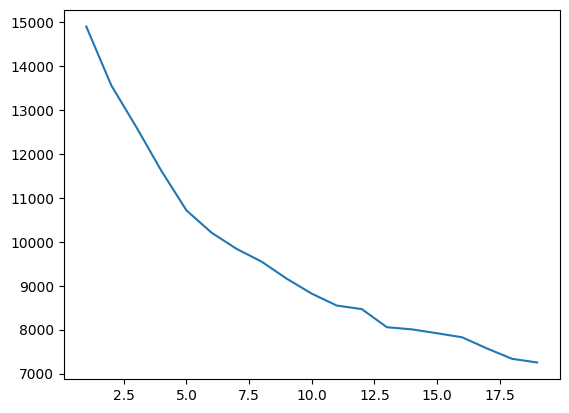

In [47]:
clusters=list(range(1,20))
ssd = []
df_0_2_d=df_0_2.drop('Combination_Label',axis=1)
for num_clusters in clusters:
    model_clus = KMeans(n_clusters = num_clusters, max_iter=150,random_state= 50)
    model_clus.fit(df_0_2_d)
    ssd.append(model_clus.inertia_)

plt.plot(clusters,ssd);

In [48]:
from sklearn.metrics import silhouette_score

range_n_clusters = list(range(2, 21))  # Adjust the range of clusters as needed

for num_clusters in range_n_clusters:
    # Initialize KMeans with the current number of clusters
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50, random_state=100)
    kmeans.fit(df_0_2_d)
    
    # Get cluster labels
    cluster_labels = kmeans.labels_
    
    # Compute silhouette score
    silhouette_avg = silhouette_score(df_0_2_d, cluster_labels)
    print("For n_clusters = {0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters = 2, the silhouette score is 0.7729812310478844
For n_clusters = 3, the silhouette score is 0.7709134860679342
For n_clusters = 4, the silhouette score is 0.09508975664475383
For n_clusters = 5, the silhouette score is 0.07766463832576369
For n_clusters = 6, the silhouette score is 0.07315203509955034
For n_clusters = 7, the silhouette score is 0.0755354016277506
For n_clusters = 8, the silhouette score is 0.05001623614640336
For n_clusters = 9, the silhouette score is 0.056549299009275945
For n_clusters = 10, the silhouette score is 0.06447221116747463
For n_clusters = 11, the silhouette score is 0.06734053318431568
For n_clusters = 12, the silhouette score is 0.061877271095151475
For n_clusters = 13, the silhouette score is 0.0614438704919858
For n_clusters = 14, the silhouette score is 0.06657941864162135
For n_clusters = 15, the silhouette score is 0.05924611019113986
For n_clusters = 16, the silhouette score is 0.03243274072556327
For n_clusters = 17, the silhouette

In [49]:
cluster = KMeans(n_clusters=5, max_iter=150, random_state= 15)
cluster.fit(df_0_2_d)
df_0_2['Cluster_Id'] = cluster.labels_
df_0_2.Cluster_Id.value_counts()

Cluster_Id
1    157
0     87
2     71
3      4
4      1
Name: count, dtype: int64

### For df_8_2

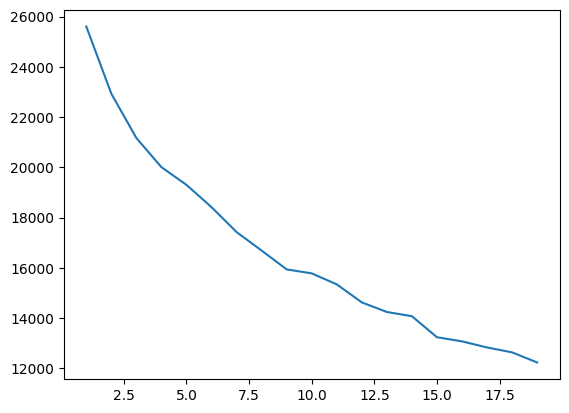

In [50]:
clusters=list(range(1,20))
ssd = []
df_8_2_d=df_8_2.drop('Combination_Label',axis=1)
for num_clusters in clusters:
    model_clus = KMeans(n_clusters = num_clusters, max_iter=150,random_state= 50)
    model_clus.fit(df_8_2_d)
    ssd.append(model_clus.inertia_)

plt.plot(clusters,ssd);

In [51]:
from sklearn.metrics import silhouette_score

range_n_clusters = list(range(2, 21))  # Adjust the range of clusters as needed

for num_clusters in range_n_clusters:
    # Initialize KMeans with the current number of clusters
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50, random_state=100)
    kmeans.fit(df_8_2_d)
    
    # Get cluster labels
    cluster_labels = kmeans.labels_
    
    # Compute silhouette score
    silhouette_avg = silhouette_score(df_8_2_d, cluster_labels)
    print("For n_clusters = {0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters = 2, the silhouette score is 0.353614433203293
For n_clusters = 3, the silhouette score is 0.3594736833345715
For n_clusters = 4, the silhouette score is 0.39642539047053604
For n_clusters = 5, the silhouette score is 0.2093369876219265
For n_clusters = 6, the silhouette score is 0.07668693951199596
For n_clusters = 7, the silhouette score is 0.08266299629513668
For n_clusters = 8, the silhouette score is 0.12286144849196307
For n_clusters = 9, the silhouette score is 0.09242515479109358
For n_clusters = 10, the silhouette score is 0.04654263939810751
For n_clusters = 11, the silhouette score is 0.06063722690058114
For n_clusters = 12, the silhouette score is 0.05995389517909634
For n_clusters = 13, the silhouette score is 0.06414599100333192
For n_clusters = 14, the silhouette score is 0.05063620741759125
For n_clusters = 15, the silhouette score is 0.05374387970949491
For n_clusters = 16, the silhouette score is 0.05749480186209733
For n_clusters = 17, the silhouette s

In [52]:
cluster = KMeans(n_clusters=4, max_iter=150, random_state= 15)
cluster.fit(df_8_2_d)
df_8_2['Cluster_Id'] = cluster.labels_
df_8_2.Cluster_Id.value_counts()

Cluster_Id
0    157
2    100
1     34
3      1
Name: count, dtype: int64

### for df_8_0

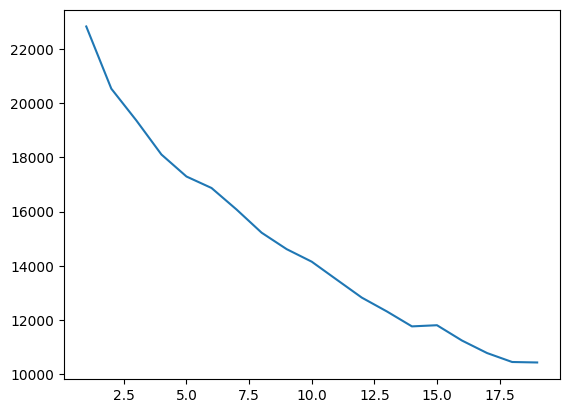

In [53]:
clusters=list(range(1,20))
ssd = []
df_8_0_d=df_8_0.drop('Combination_Label',axis=1)
for num_clusters in clusters:
    model_clus = KMeans(n_clusters = num_clusters, max_iter=150,random_state= 50)
    model_clus.fit(df_8_0_d)
    ssd.append(model_clus.inertia_)

plt.plot(clusters,ssd);

In [54]:
from sklearn.metrics import silhouette_score

range_n_clusters = list(range(2, 21))  # Adjust the range of clusters as needed

for num_clusters in range_n_clusters:
    # Initialize KMeans with the current number of clusters
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50, random_state=100)
    kmeans.fit(df_8_0_d)
    
    # Get cluster labels
    cluster_labels = kmeans.labels_
    
    # Compute silhouette score
    silhouette_avg = silhouette_score(df_8_0_d, cluster_labels)
    print("For n_clusters = {0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters = 2, the silhouette score is 0.2892513113963968
For n_clusters = 3, the silhouette score is 0.1503657588962528
For n_clusters = 4, the silhouette score is 0.14309935915630811
For n_clusters = 5, the silhouette score is 0.1321739183022967
For n_clusters = 6, the silhouette score is 0.13384443571948546
For n_clusters = 7, the silhouette score is 0.12586065203591418
For n_clusters = 8, the silhouette score is 0.15845826329260584
For n_clusters = 9, the silhouette score is 0.06885166087157803
For n_clusters = 10, the silhouette score is 0.09720774569918429
For n_clusters = 11, the silhouette score is 0.10416127559046774
For n_clusters = 12, the silhouette score is 0.10254447432375006
For n_clusters = 13, the silhouette score is 0.1103249377955188
For n_clusters = 14, the silhouette score is 0.058714854388075
For n_clusters = 15, the silhouette score is 0.06221108466684139
For n_clusters = 16, the silhouette score is 0.06361943816560775
For n_clusters = 17, the silhouette sco

In [55]:
cluster = KMeans(n_clusters=4, max_iter=150, random_state= 15)
cluster.fit(df_8_0_d)
df_8_0['Cluster_Id'] = cluster.labels_
df_8_0.Cluster_Id.value_counts()

Cluster_Id
1    179
0     63
3     48
2      1
Name: count, dtype: int64

### for df_0_1

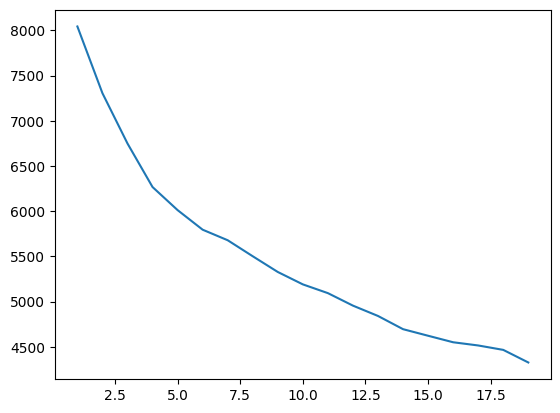

In [56]:
clusters=list(range(1,20))
ssd = []
df_0_1_d=df_0_1.drop('Combination_Label',axis=1)
for num_clusters in clusters:
    model_clus = KMeans(n_clusters = num_clusters, max_iter=150,random_state= 50)
    model_clus.fit(df_0_1_d)
    ssd.append(model_clus.inertia_)

plt.plot(clusters,ssd);

In [57]:
from sklearn.metrics import silhouette_score

range_n_clusters = list(range(2, 21))  # Adjust the range of clusters as needed

for num_clusters in range_n_clusters:
    # Initialize KMeans with the current number of clusters
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50, random_state=100)
    kmeans.fit(df_0_1_d)
    
    # Get cluster labels
    cluster_labels = kmeans.labels_
    
    # Compute silhouette score
    silhouette_avg = silhouette_score(df_0_1_d, cluster_labels)
    print("For n_clusters = {0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters = 2, the silhouette score is 0.11255512302678111
For n_clusters = 3, the silhouette score is 0.11239331676289097
For n_clusters = 4, the silhouette score is 0.08220858307321166
For n_clusters = 5, the silhouette score is 0.06287655331966224
For n_clusters = 6, the silhouette score is 0.046834523024667035
For n_clusters = 7, the silhouette score is 0.059699089272226516
For n_clusters = 8, the silhouette score is 0.07388895146155201
For n_clusters = 9, the silhouette score is 0.04983603252256972
For n_clusters = 10, the silhouette score is 0.049177821598859514
For n_clusters = 11, the silhouette score is 0.067504902416886
For n_clusters = 12, the silhouette score is 0.05515387662876429
For n_clusters = 13, the silhouette score is 0.042683676103011735
For n_clusters = 14, the silhouette score is 0.06149204731073259
For n_clusters = 15, the silhouette score is 0.019259771984024662
For n_clusters = 16, the silhouette score is 0.035563346027225606
For n_clusters = 17, the silh

In [58]:
cluster = KMeans(n_clusters=4, max_iter=150, random_state= 15)
cluster.fit(df_0_1_d)
df_0_1['Cluster_Id'] = cluster.labels_
df_0_1.Cluster_Id.value_counts()

Cluster_Id
1    99
0    73
3    64
2     3
Name: count, dtype: int64

### for df_3_1

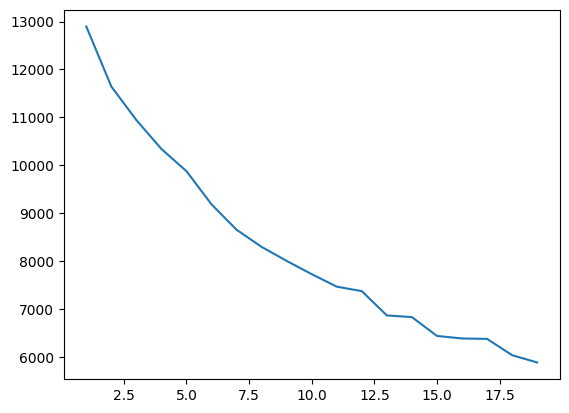

In [59]:
clusters=list(range(1,20))
ssd = []
df_3_1_d=df_3_1.drop('Combination_Label',axis=1)
for num_clusters in clusters:
    model_clus = KMeans(n_clusters = num_clusters, max_iter=150,random_state= 50)
    model_clus.fit(df_3_1_d)
    ssd.append(model_clus.inertia_)

plt.plot(clusters,ssd);

In [60]:
from sklearn.metrics import silhouette_score

range_n_clusters = list(range(2, 21))  # Adjust the range of clusters as needed

for num_clusters in range_n_clusters:
    # Initialize KMeans with the current number of clusters
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50, random_state=100)
    kmeans.fit(df_3_1_d)
    
    # Get cluster labels
    cluster_labels = kmeans.labels_
    
    # Compute silhouette score
    silhouette_avg = silhouette_score(df_3_1_d, cluster_labels)
    print("For n_clusters = {0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters = 2, the silhouette score is 0.29709493762474404
For n_clusters = 3, the silhouette score is 0.11588990506222234
For n_clusters = 4, the silhouette score is 0.11696206604326392
For n_clusters = 5, the silhouette score is 0.12720525782048472
For n_clusters = 6, the silhouette score is 0.10307770176995242
For n_clusters = 7, the silhouette score is 0.11839805222719511
For n_clusters = 8, the silhouette score is 0.03547910017173884
For n_clusters = 9, the silhouette score is 0.01936911440625715
For n_clusters = 10, the silhouette score is 0.028597370275607988
For n_clusters = 11, the silhouette score is 0.05659431987761796
For n_clusters = 12, the silhouette score is 0.06420609876946089
For n_clusters = 13, the silhouette score is 0.02858930170205052
For n_clusters = 14, the silhouette score is 0.039896634020216135
For n_clusters = 15, the silhouette score is 0.0294541335349338
For n_clusters = 16, the silhouette score is 0.014575938607480406
For n_clusters = 17, the silhou

In [61]:
cluster = KMeans(n_clusters=2, max_iter=150, random_state= 15)
cluster.fit(df_3_1_d)
df_3_1['Cluster_Id'] = cluster.labels_
df_3_1.Cluster_Id.value_counts()

Cluster_Id
1    167
0     67
Name: count, dtype: int64

### for df_0_0

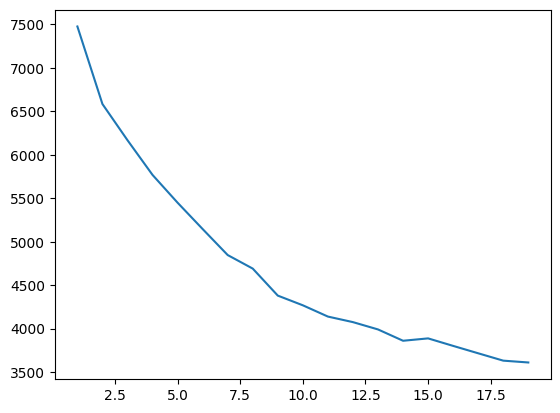

In [62]:
clusters=list(range(1,20))
ssd = []
df_0_0_d=df_0_0.drop('Combination_Label',axis=1)
for num_clusters in clusters:
    model_clus = KMeans(n_clusters = num_clusters, max_iter=150,random_state= 50)
    model_clus.fit(df_0_0_d)
    ssd.append(model_clus.inertia_)

plt.plot(clusters,ssd);

In [63]:
from sklearn.metrics import silhouette_score

range_n_clusters = list(range(2, 21))  # Adjust the range of clusters as needed

for num_clusters in range_n_clusters:
    # Initialize KMeans with the current number of clusters
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50, random_state=100)
    kmeans.fit(df_0_0_d)
    
    # Get cluster labels
    cluster_labels = kmeans.labels_
    
    # Compute silhouette score
    silhouette_avg = silhouette_score(df_0_0_d, cluster_labels)
    print("For n_clusters = {0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters = 2, the silhouette score is 0.149418481714086
For n_clusters = 3, the silhouette score is 0.15276475518513052
For n_clusters = 4, the silhouette score is 0.10985231782954581
For n_clusters = 5, the silhouette score is 0.12695913367671588
For n_clusters = 6, the silhouette score is 0.0867927919472578
For n_clusters = 7, the silhouette score is 0.09450844657625149
For n_clusters = 8, the silhouette score is 0.09945776268467142
For n_clusters = 9, the silhouette score is 0.09508393147310834
For n_clusters = 10, the silhouette score is 0.08106515779296629
For n_clusters = 11, the silhouette score is 0.08646620537822679
For n_clusters = 12, the silhouette score is 0.07110950018329107
For n_clusters = 13, the silhouette score is 0.08108141070958987
For n_clusters = 14, the silhouette score is 0.07577025999051469
For n_clusters = 15, the silhouette score is 0.07524081950967369
For n_clusters = 16, the silhouette score is 0.06244740959025146
For n_clusters = 17, the silhouette 

In [64]:
cluster = KMeans(n_clusters=4, max_iter=150, random_state= 15)
cluster.fit(df_0_0_d)
df_0_0['Cluster_Id'] = cluster.labels_
df_0_0.Cluster_Id.value_counts()

Cluster_Id
3    82
0    56
2    45
1    42
Name: count, dtype: int64

### For df_5_0

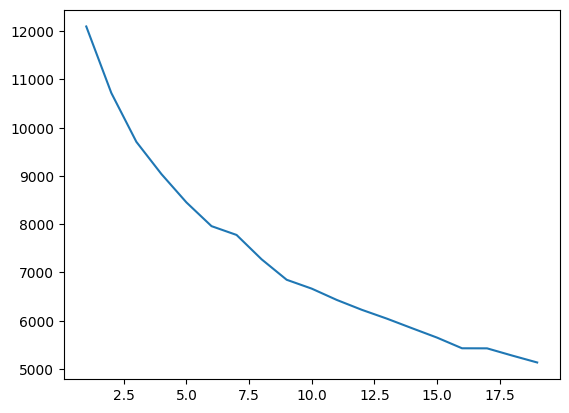

In [65]:
clusters=list(range(1,20))
ssd = []
df_5_0_d=df_5_0.drop('Combination_Label',axis=1)
for num_clusters in clusters:
    model_clus = KMeans(n_clusters = num_clusters, max_iter=150,random_state= 50)
    model_clus.fit(df_5_0_d)
    ssd.append(model_clus.inertia_)

plt.plot(clusters,ssd);

In [66]:
from sklearn.metrics import silhouette_score

range_n_clusters = list(range(2, 21))  # Adjust the range of clusters as needed

for num_clusters in range_n_clusters:
    # Initialize KMeans with the current number of clusters
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50, random_state=100)
    kmeans.fit(df_5_0_d)
    
    # Get cluster labels
    cluster_labels = kmeans.labels_
    
    # Compute silhouette score
    silhouette_avg = silhouette_score(df_5_0_d, cluster_labels)
    print("For n_clusters = {0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters = 2, the silhouette score is 0.7519192967196479
For n_clusters = 3, the silhouette score is 0.6662698681705111
For n_clusters = 4, the silhouette score is 0.07001531669162377
For n_clusters = 5, the silhouette score is 0.0711389659346199
For n_clusters = 6, the silhouette score is 0.026716589437778146
For n_clusters = 7, the silhouette score is 0.0581397198123871
For n_clusters = 8, the silhouette score is 0.053880590459535284
For n_clusters = 9, the silhouette score is 0.026106916894327342
For n_clusters = 10, the silhouette score is 0.043332175690104446
For n_clusters = 11, the silhouette score is 0.03939737833865855
For n_clusters = 12, the silhouette score is 0.02365966500383699
For n_clusters = 13, the silhouette score is 0.045317428328263784
For n_clusters = 14, the silhouette score is 0.020436214364009067
For n_clusters = 15, the silhouette score is 0.0454284813994107
For n_clusters = 16, the silhouette score is 0.02388963644263424
For n_clusters = 17, the silhoue

In [67]:
cluster = KMeans(n_clusters=6, max_iter=150, random_state= 15)
cluster.fit(df_5_0_d)
df_5_0['Cluster_Id'] = cluster.labels_
df_5_0.Cluster_Id.value_counts()

Cluster_Id
1    77
0    59
3    39
5     1
2     1
4     1
Name: count, dtype: int64

### For df_5_1

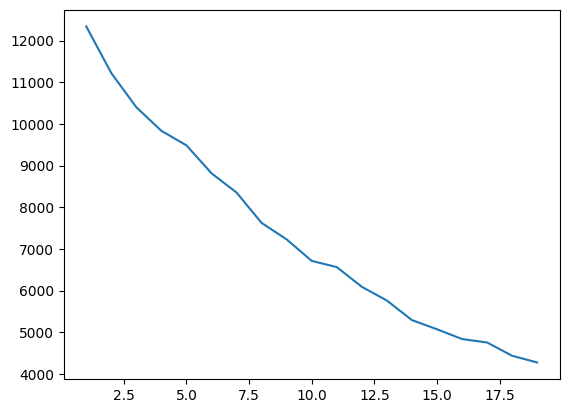

In [68]:
clusters=list(range(1,20))
ssd = []
df_5_1_d=df_5_1.drop('Combination_Label',axis=1)
for num_clusters in clusters:
    model_clus = KMeans(n_clusters = num_clusters, max_iter=150,random_state= 50)
    model_clus.fit(df_5_1_d)
    ssd.append(model_clus.inertia_)

plt.plot(clusters,ssd);

In [69]:
from sklearn.metrics import silhouette_score

range_n_clusters = list(range(2, 21))  # Adjust the range of clusters as needed

for num_clusters in range_n_clusters:
    # Initialize KMeans with the current number of clusters
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50, random_state=100)
    kmeans.fit(df_5_1_d)
    
    # Get cluster labels
    cluster_labels = kmeans.labels_
    
    # Compute silhouette score
    silhouette_avg = silhouette_score(df_5_1_d, cluster_labels)
    print("For n_clusters = {0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters = 2, the silhouette score is 0.3045353833894507
For n_clusters = 3, the silhouette score is 0.2572004910417089
For n_clusters = 4, the silhouette score is 0.3444138484695279
For n_clusters = 5, the silhouette score is 0.12576362252400985
For n_clusters = 6, the silhouette score is 0.033184560788920306
For n_clusters = 7, the silhouette score is 0.044864130043329044
For n_clusters = 8, the silhouette score is 0.1316053262100005
For n_clusters = 9, the silhouette score is 0.28053734921484563
For n_clusters = 10, the silhouette score is 0.05026943263867921
For n_clusters = 11, the silhouette score is 0.0522688675837986
For n_clusters = 12, the silhouette score is 0.06109820787928195
For n_clusters = 13, the silhouette score is 0.053695795619240316
For n_clusters = 14, the silhouette score is 0.07276200231661928
For n_clusters = 15, the silhouette score is 0.057361723209872297
For n_clusters = 16, the silhouette score is 0.11227114295764863
For n_clusters = 17, the silhouett

In [70]:
cluster = KMeans(n_clusters=4, max_iter=150, random_state= 15)
cluster.fit(df_5_1_d)
df_5_1['Cluster_Id'] = cluster.labels_
df_5_1.Cluster_Id.value_counts()

Cluster_Id
2    82
0    20
3    17
1     1
Name: count, dtype: int64

### For df_3_0

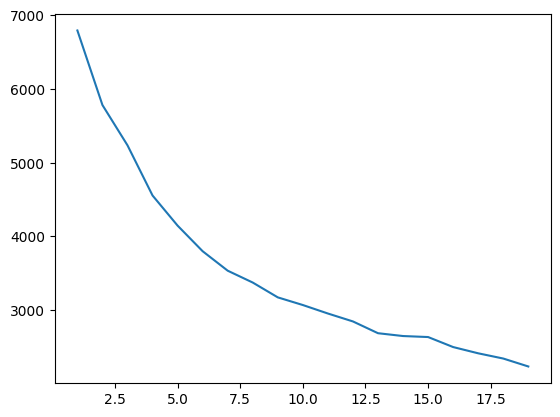

In [71]:
clusters=list(range(1,20))
ssd = []
df_3_0_d=df_3_0.drop('Combination_Label',axis=1)
for num_clusters in clusters:
    model_clus = KMeans(n_clusters = num_clusters, max_iter=150,random_state= 50)
    model_clus.fit(df_3_0_d)
    ssd.append(model_clus.inertia_)

plt.plot(clusters,ssd);

In [72]:
from sklearn.metrics import silhouette_score

range_n_clusters = list(range(2, 21))  # Adjust the range of clusters as needed

for num_clusters in range_n_clusters:
    # Initialize KMeans with the current number of clusters
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50, random_state=100)
    kmeans.fit(df_3_0_d)
    
    # Get cluster labels
    cluster_labels = kmeans.labels_
    
    # Compute silhouette score
    silhouette_avg = silhouette_score(df_3_0_d, cluster_labels)
    print("For n_clusters = {0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters = 2, the silhouette score is 0.7015598928489338
For n_clusters = 3, the silhouette score is 0.08595590323350374
For n_clusters = 4, the silhouette score is 0.4304108121425796
For n_clusters = 5, the silhouette score is 0.10310591681851952
For n_clusters = 6, the silhouette score is 0.09763377132594551
For n_clusters = 7, the silhouette score is 0.08240853898919298
For n_clusters = 8, the silhouette score is 0.08908672833956362
For n_clusters = 9, the silhouette score is 0.10558814236847354
For n_clusters = 10, the silhouette score is 0.08574769507054408
For n_clusters = 11, the silhouette score is 0.09034470172623263
For n_clusters = 12, the silhouette score is 0.0613136931546561
For n_clusters = 13, the silhouette score is 0.06642376336030635
For n_clusters = 14, the silhouette score is 0.038215718282479966
For n_clusters = 15, the silhouette score is 0.07901041884414362
For n_clusters = 16, the silhouette score is 0.05078414443797158
For n_clusters = 17, the silhouette

In [73]:
cluster = KMeans(n_clusters=3, max_iter=150, random_state= 15)
cluster.fit(df_3_0_d)
df_3_0['Cluster_Id'] = cluster.labels_
df_3_0.Cluster_Id.value_counts()

Cluster_Id
1    60
2    46
0     2
Name: count, dtype: int64

### For df_0_4

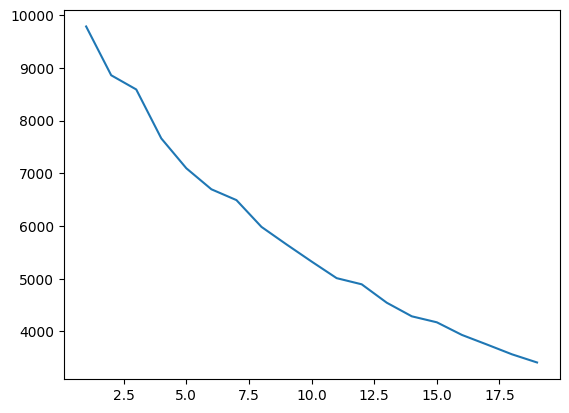

In [74]:
clusters=list(range(1,20))
ssd = []
df_0_4_d=df_0_4.drop('Combination_Label',axis=1)
for num_clusters in clusters:
    model_clus = KMeans(n_clusters = num_clusters, max_iter=150,random_state= 50)
    model_clus.fit(df_0_4_d)
    ssd.append(model_clus.inertia_)

plt.plot(clusters,ssd);

In [75]:
from sklearn.metrics import silhouette_score

range_n_clusters = list(range(2, 21))  # Adjust the range of clusters as needed

for num_clusters in range_n_clusters:
    # Initialize KMeans with the current number of clusters
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50, random_state=100)
    kmeans.fit(df_0_4_d)
    
    # Get cluster labels
    cluster_labels = kmeans.labels_
    
    # Compute silhouette score
    silhouette_avg = silhouette_score(df_0_4_d, cluster_labels)
    print("For n_clusters = {0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters = 2, the silhouette score is 0.6218065796066425
For n_clusters = 3, the silhouette score is 0.3262931166991889
For n_clusters = 4, the silhouette score is 0.06555608003587664
For n_clusters = 5, the silhouette score is 0.07984839134061743
For n_clusters = 6, the silhouette score is 0.07528876245828678
For n_clusters = 7, the silhouette score is 0.0818047450478529
For n_clusters = 8, the silhouette score is 0.07021302844074019
For n_clusters = 9, the silhouette score is 0.06935298806802496
For n_clusters = 10, the silhouette score is 0.07592229937782345
For n_clusters = 11, the silhouette score is 0.05041829899411779
For n_clusters = 12, the silhouette score is 0.07583335841258868
For n_clusters = 13, the silhouette score is 0.06079023932524151
For n_clusters = 14, the silhouette score is 0.05168198411241785
For n_clusters = 15, the silhouette score is 0.0832228488017564
For n_clusters = 16, the silhouette score is 0.05532407809390666
For n_clusters = 17, the silhouette s

In [76]:
cluster = KMeans(n_clusters=3, max_iter=150, random_state= 15)
cluster.fit(df_0_4_d)
df_0_4['Cluster_Id'] = cluster.labels_
df_0_4.Cluster_Id.value_counts()

Cluster_Id
2    73
0    31
1     1
Name: count, dtype: int64

### For df_10_3

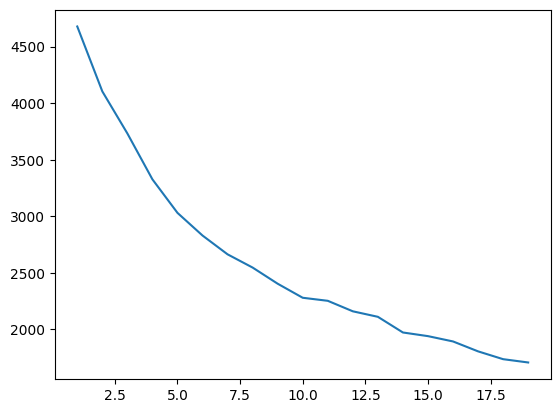

In [77]:
clusters=list(range(1,20))
ssd = []
df_10_3_d=df_10_3.drop('Combination_Label',axis=1)
for num_clusters in clusters:
    model_clus = KMeans(n_clusters = num_clusters, max_iter=150,random_state= 50)
    model_clus.fit(df_10_3_d)
    ssd.append(model_clus.inertia_)

plt.plot(clusters,ssd);

In [78]:
from sklearn.metrics import silhouette_score

range_n_clusters = list(range(2, 21))  # Adjust the range of clusters as needed

for num_clusters in range_n_clusters:
    # Initialize KMeans with the current number of clusters
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50, random_state=100)
    kmeans.fit(df_10_3_d)
    
    # Get cluster labels
    cluster_labels = kmeans.labels_
    
    # Compute silhouette score
    silhouette_avg = silhouette_score(df_10_3_d, cluster_labels)
    print("For n_clusters = {0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters = 2, the silhouette score is 0.6038099648722999
For n_clusters = 3, the silhouette score is 0.08718264969185488
For n_clusters = 4, the silhouette score is 0.09317234931323215
For n_clusters = 5, the silhouette score is 0.09405463924938302
For n_clusters = 6, the silhouette score is 0.09402886923694295
For n_clusters = 7, the silhouette score is 0.08394571267814309
For n_clusters = 8, the silhouette score is 0.07719348015522477
For n_clusters = 9, the silhouette score is 0.06683884482478
For n_clusters = 10, the silhouette score is 0.05303175499900674
For n_clusters = 11, the silhouette score is 0.05871065437532625
For n_clusters = 12, the silhouette score is 0.0577524138981412
For n_clusters = 13, the silhouette score is 0.05512425660093954
For n_clusters = 14, the silhouette score is 0.04832091499154378
For n_clusters = 15, the silhouette score is 0.04644184604476652
For n_clusters = 16, the silhouette score is 0.04234078142938991
For n_clusters = 17, the silhouette sc

In [79]:
cluster = KMeans(n_clusters=3, max_iter=150, random_state= 15)
cluster.fit(df_10_3_d)
df_10_3['Cluster_Id'] = cluster.labels_
df_10_3.Cluster_Id.value_counts()

Cluster_Id
1    66
0    36
2     1
Name: count, dtype: int64

### For df_6_0

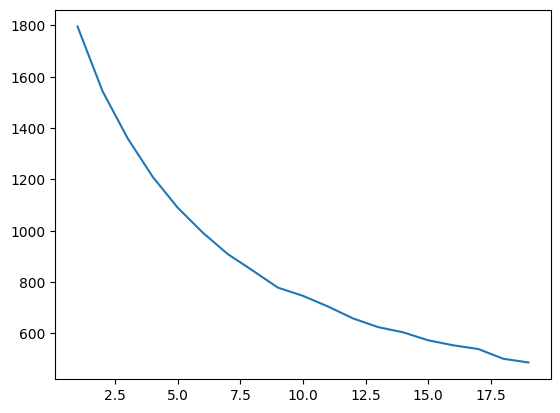

In [80]:
clusters=list(range(1,20))
ssd = []
df_6_0_d=df_6_0.drop('Combination_Label',axis=1)
for num_clusters in clusters:
    model_clus = KMeans(n_clusters = num_clusters, max_iter=150,random_state= 50)
    model_clus.fit(df_6_0_d)
    ssd.append(model_clus.inertia_)

plt.plot(clusters,ssd);

In [81]:
from sklearn.metrics import silhouette_score

range_n_clusters = list(range(2, 21))  # Adjust the range of clusters as needed

for num_clusters in range_n_clusters:
    # Initialize KMeans with the current number of clusters
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50, random_state=100)
    kmeans.fit(df_6_0_d)
    
    # Get cluster labels
    cluster_labels = kmeans.labels_
    
    # Compute silhouette score
    silhouette_avg = silhouette_score(df_6_0_d, cluster_labels)
    print("For n_clusters = {0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters = 2, the silhouette score is 0.14181345348451108
For n_clusters = 3, the silhouette score is 0.17698188073927784
For n_clusters = 4, the silhouette score is 0.18442388608995183
For n_clusters = 5, the silhouette score is 0.18064670009431327
For n_clusters = 6, the silhouette score is 0.19771830721573447
For n_clusters = 7, the silhouette score is 0.1826024412437437
For n_clusters = 8, the silhouette score is 0.15793064900333864
For n_clusters = 9, the silhouette score is 0.1631857863032198
For n_clusters = 10, the silhouette score is 0.17835010716702066
For n_clusters = 11, the silhouette score is 0.15678814049102907
For n_clusters = 12, the silhouette score is 0.14186089861385914
For n_clusters = 13, the silhouette score is 0.1287470924973289
For n_clusters = 14, the silhouette score is 0.09970643320942531
For n_clusters = 15, the silhouette score is 0.1308829055328677
For n_clusters = 16, the silhouette score is 0.1340820338039421
For n_clusters = 17, the silhouette sc

In [82]:
cluster = KMeans(n_clusters=5, max_iter=150, random_state= 15)
cluster.fit(df_6_0_d)
df_6_0['Cluster_Id'] = cluster.labels_
df_6_0.Cluster_Id.value_counts()

Cluster_Id
3    37
0    26
4    23
1    10
2     1
Name: count, dtype: int64

### For df_6_3

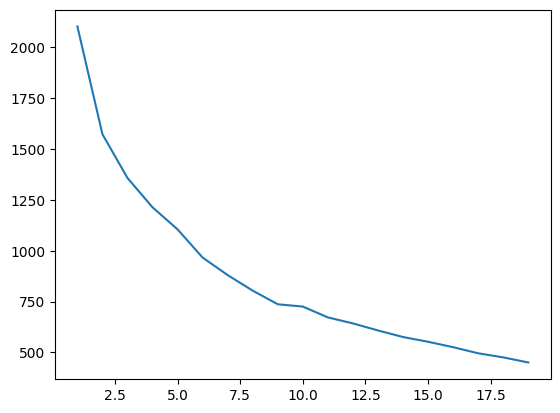

In [83]:
clusters=list(range(1,20))
ssd = []
df_6_3_d=df_6_3.drop('Combination_Label',axis=1)
for num_clusters in clusters:
    model_clus = KMeans(n_clusters = num_clusters, max_iter=150,random_state= 50)
    model_clus.fit(df_6_3_d)
    ssd.append(model_clus.inertia_)

plt.plot(clusters,ssd);

In [84]:
from sklearn.metrics import silhouette_score

range_n_clusters = list(range(2, 21))  # Adjust the range of clusters as needed

for num_clusters in range_n_clusters:
    # Initialize KMeans with the current number of clusters
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50, random_state=100)
    kmeans.fit(df_6_3_d)
    
    # Get cluster labels
    cluster_labels = kmeans.labels_
    
    # Compute silhouette score
    silhouette_avg = silhouette_score(df_6_3_d, cluster_labels)
    print("For n_clusters = {0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters = 2, the silhouette score is 0.5218016727505868
For n_clusters = 3, the silhouette score is 0.14861210256289034
For n_clusters = 4, the silhouette score is 0.14989315574728468
For n_clusters = 5, the silhouette score is 0.16100872205299196
For n_clusters = 6, the silhouette score is 0.13577357200667908
For n_clusters = 7, the silhouette score is 0.13345654298675744
For n_clusters = 8, the silhouette score is 0.12351685802643121
For n_clusters = 9, the silhouette score is 0.1194151072331113
For n_clusters = 10, the silhouette score is 0.15180104877146547
For n_clusters = 11, the silhouette score is 0.14499731539658142
For n_clusters = 12, the silhouette score is 0.12901223464592637
For n_clusters = 13, the silhouette score is 0.12851556793253552
For n_clusters = 14, the silhouette score is 0.11781202552198923
For n_clusters = 15, the silhouette score is 0.12074552849097041
For n_clusters = 16, the silhouette score is 0.14454414054143971
For n_clusters = 17, the silhouette

In [85]:
cluster = KMeans(n_clusters=3, max_iter=150, random_state= 15)
cluster.fit(df_6_3_d)
df_6_3['Cluster_Id'] = cluster.labels_
df_6_3.Cluster_Id.value_counts()

Cluster_Id
0    51
1    25
2     5
Name: count, dtype: int64

### Adding column Cluster_Id to the remaining dataframes that we didnt clusterize futher

In [86]:
# Add unique Cluster_Id to each DataFrame manually
df_10_1['Cluster_Id'] = 'cluster_1'
df_10_0['Cluster_Id'] = 'cluster_2'
df_2_1['Cluster_Id'] = 'cluster_3'
df_9_0['Cluster_Id'] = 'cluster_4'
df_1_1['Cluster_Id'] = 'cluster_5'
df_2_0['Cluster_Id'] = 'cluster_6'
df_6_2['Cluster_Id'] = 'cluster_7'
df_3_2['Cluster_Id'] = 'cluster_8'
df_4_0['Cluster_Id'] = 'cluster_9'
df_9_1['Cluster_Id'] = 'cluster_10'
df_0_3['Cluster_Id'] = 'cluster_11'
df_3_3['Cluster_Id'] = 'cluster_12'
df_9_3['Cluster_Id'] = 'cluster_13'
df_8_1['Cluster_Id'] = 'cluster_14'
df_1_0['Cluster_Id'] = 'cluster_15'
df_8_3['Cluster_Id'] = 'cluster_16'
df_6_1['Cluster_Id'] = 'cluster_17'
df_9_2['Cluster_Id'] = 'cluster_18'
df_2_2['Cluster_Id'] = 'cluster_19'
df_4_1['Cluster_Id'] = 'cluster_20'
df_10_2['Cluster_Id'] = 'cluster_21'

In [87]:
import pandas as pd

# List of all the DataFrames
dataframes = [
    df_0_2, df_8_2, df_8_0, df_0_1, df_3_1, df_0_0, df_5_0, df_5_1, df_3_0, df_0_4, df_10_3, df_6_0, df_6_3,
    df_10_1, df_10_0, df_2_1, df_9_0, df_1_1, df_2_0, df_6_2, df_3_2, df_4_0, df_9_1, df_0_3, df_3_3, df_9_3,
    df_8_1, df_1_0, df_8_3, df_6_1, df_9_2, df_2_2, df_4_1, df_10_2
]

# Concatenate all DataFrames
df_concatenated_all = pd.concat(dataframes, ignore_index=True)

df_concatenated_all

,Age,Ast/90,npG/90,npG+A/90,xA/90,npxG/90,npxG+xA/90,Shots/90,SoTs/90,SoT%,...,CarryIntoThird/90,CarryIntoBox/90,Miscontrol/90,Dispossessed/90,PassTarget/90,PassesReceived/90,PassRec%,ProgPassReceived/90,Combination_Label,Cluster_Id
0,0.811342,-0.133881,-0.572368,-0.414915,-0.262496,-0.274314,-0.354759,-0.154265,-0.095325,0.409017,...,0.272632,0.196689,-0.400039,-0.269409,-0.072776,0.226454,0.576964,-0.297591,0_2,1
1,-1.130605,-0.349578,0.221574,-0.148845,-0.194866,-0.221617,-0.237658,-0.481136,-0.442872,0.030539,...,-0.404909,-0.574309,0.124019,0.231426,-0.705353,-0.724911,-0.295344,-0.135821,0_2,2
2,-0.483289,-0.220160,-0.144861,-0.248621,-0.194866,-0.432407,-0.432826,-0.513823,-0.422428,0.194698,...,0.010855,-0.289375,-0.388128,-0.475232,0.000214,0.376327,0.725199,-0.695387,0_2,1
3,0.379798,-0.349578,0.038357,-0.248621,-0.330126,-0.379709,-0.471859,-0.726289,-0.504204,1.170534,...,-0.335615,-0.406701,-0.483412,-0.468371,-1.593394,-1.291821,0.576964,-0.698039,0_2,2
4,-0.699061,0.168096,-0.572368,-0.182104,-0.059605,-0.537801,-0.432826,-0.652743,-0.708643,-1.109457,...,0.072450,-0.172049,-0.328576,0.039325,-0.206590,0.083098,0.559860,-0.536268,0_2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2817,0.811342,-0.349578,-0.572368,-0.581208,-0.533018,-0.590499,-0.745094,-0.897896,-0.708643,-1.109457,...,-0.897666,-0.574309,-0.793082,-0.825130,-1.836693,-1.467759,0.987461,-0.918152,6_1,cluster_17
2818,-0.914833,-0.349578,-0.572368,-0.581208,0.278547,-0.590499,-0.276691,-0.897896,-0.708643,-1.109457,...,-0.897666,-0.574309,-0.793082,-0.825130,-0.516796,-0.053742,0.987461,-0.918152,9_2,cluster_18
2819,0.595570,-0.349578,-0.572368,-0.581208,-0.533018,0.041870,-0.276691,7.273877,19.735284,3.450525,...,6.801665,-0.574309,5.162123,-0.825130,2.828564,3.530170,0.987461,4.385790,2_2,cluster_19
2820,1.458658,-0.349578,-0.572368,-0.581208,-0.533018,-0.590499,-0.745094,-0.897896,-0.708643,-1.109457,...,-0.897666,-0.574309,-0.793082,-0.825130,0.395575,-0.379553,-1.293081,-0.918152,4_1,cluster_20


### Filtering out the cluster_id from the final clustering dataset

In [88]:
clusters_pos = df_concatenated_all[['Cluster_Id']]
clusters_pos

,Cluster_Id
0,1
1,2
2,1
3,2
4,1
...,...
2817,cluster_17
2818,cluster_18
2819,cluster_19
2820,cluster_20


### merging the original dataset with the clusters_pos

In [89]:
final_dataset = pd.merge(clusters_pos, df, left_index=True, right_index=True, how='inner')

In [90]:
final_dataset

,Cluster_Id,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,...,PrgDistCarry/90,ProgCarry/90,CarryIntoThird/90,CarryIntoBox/90,Miscontrol/90,Dispossessed/90,PassTarget/90,PassesReceived/90,PassRec%,ProgPassReceived/90
0,1,Patrick van Aanholt,nl NED,DF,Crystal Palace,eng Premier League,29.0,1990.0,22,20,...,96.8,5.79,1.52,0.46,0.66,0.81,42.3,39.3,92.8,2.34
1,2,Yunis Abdelhamid,ma MAR,DF,Reims,fr Ligue 1,32.0,1987.0,33,33,...,130.5,1.81,0.25,0.03,0.25,0.47,43.8,42.5,97.0,0.22
2,1,Pape Abou Cisse,sn SEN,DF,Saint-Étienne,fr Ligue 1,24.0,1995.0,14,14,...,117.9,1.14,0.07,0.00,0.14,0.07,33.7,32.9,97.7,0.00
3,2,David Abraham,ar ARG,DF,Eint Frankfurt,de Bundesliga,34.0,1986.0,14,14,...,92.7,3.24,0.66,0.00,0.22,0.00,34.8,33.4,96.0,0.59
4,1,Francesco Acerbi,it ITA,DF,Lazio,it Serie A,32.0,1988.0,32,32,...,166.3,3.71,1.02,0.03,0.45,0.26,50.9,49.5,97.3,0.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2817,cluster_17,Nick Woltemade,de GER,"MF,FW",Werder Bremen,de Bundesliga,18.0,2002.0,6,1,...,90.6,6.25,1.88,1.88,5.00,3.75,50.0,32.5,65.0,5.63
2818,cluster_18,Reinhold Yabo,de GER,"MF,FW",Arminia,de Bundesliga,28.0,1992.0,13,8,...,76.3,3.47,1.39,0.42,0.97,0.97,31.1,21.0,67.4,2.78
2819,cluster_19,Amin Younes,de GER,"MF,FW",Eint Frankfurt,de Bundesliga,26.0,1993.0,26,16,...,138.4,8.71,2.00,1.03,2.19,2.58,58.1,44.3,76.2,8.26
2820,cluster_20,Mattia Zaccagni,it ITA,"MF,FW",Hellas Verona,it Serie A,25.0,1995.0,36,33,...,141.8,7.45,2.52,1.10,2.31,2.86,49.2,35.5,72.1,8.21


In [92]:
# final_dataset.to_csv("Data/final_clustered.csv")